# Chapter 4 - Training Models

## Signs Used in This `IPythonNotebook`
- I have Used **Exit** Heading for Writing a Paragraph or a Text That Does't Fall under any Heading.
- I have Used **Bold** Font to Highlight a Name or an Important Text.
- I have Used `This` Type of Highlighter for Programming name or a Small Code.
   - For Example :- `python`, `numpy`, `ndarray`, `pandas`, `DataFrame`, `loc`, `iloc`
- I have used *Italic* Font For Some Important but not so Important Text.

So Far We Have Treated Our Machine Learning Models Like Black Boxes and Many of You Have Wondered that What We Can Do Without Knowing Even a Little Thing about How Things Work Under-The-Hood However Knowing How Things Work Can Help us in Many Different Ways One of Then is *Fine Tuning* Models. But in This Chapter Finally We are Going to Look at **How Things Work Under the Hood**.

## What We are going to Learn.
- Linear Regression
 - The Normal Equation
  - Computational Complexity
- Gradient Descent
  - Batch Gradient Descent
  - Stochastic Gradient Descent
  - Mini-Batch Gradient Descent
- Polynomial Regression
- Learning in Curves
- Regularized Linear Models
  - Ridge Regression
  - Lasso Regression
  - Elastic Net
  - Early Stopping
- Logistic Regression
  - Estimating Probabilities
  - Training and Cost Function
  - Decision Boundaries
  - Softmax Regression

# Linear Regression
This is the Main Equation in Which **Linear Regression** Model Relies on.
$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

### Equation 4-1
Let's say we have a dataset of housing prices in a certain area, and we want to predict the price of a house based on its size (in square feet) and the number of bedrooms. We can model this problem using linear regression, with the price of the house being the target variable and the size and number of bedrooms being the input features. 

Using Equation 4-1, we can express the linear regression model as:

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2,
$$

where:

- $\hat{y}$ is the predicted price of the house,
- $x_1$ is the size of the house (in square feet),
- $x_2$ is the number of bedrooms,
- $\theta_0$ is the intercept term (representing the base price of the house),
- $\theta_1$ is the weight of the size feature (representing how much the price of the house increases per square foot),
- $\theta_2$ is the weight of the number of bedrooms feature (representing how much the price of the house increases per additional bedroom).

To train the linear regression model, we need a dataset of labeled examples, where each example consists of the input features (size and number of bedrooms) and the corresponding label (price of the house). Let's say we have the following dataset:

<div align="center">

| Size (sq. ft.) | Bedrooms | Price ($) |
| --- | --- | --- |
| 1500 | 3 | 220000 |
| 2000 | 4 | 300000 |
| 1200 | 2 | 180000 |
| 1800 | 3 | 240000 |
| 1600 | 3 | 210000 |

</div>

Using this dataset, we can estimate the values of the parameters $\theta_0$, $\theta_1$, and $\theta_2$ that minimize the difference between the predicted prices and the actual prices of the houses in the training data. We can then use these parameters to make predictions for new houses.

For example, let's say we want to predict the price of a house that is 1700 square feet and has 3 bedrooms. We can plug these values into Equation 4-1 and use the learned values of $\theta_0$, $\theta_1$, and $\theta_2$ to compute the predicted price as follows:

$$
\begin{aligned}
\hat{y} &= \theta_0 + \theta_1 x_1 + \theta_2 x_2 \\
&= 150000 + 100 \times 1700 + 50000 \times 3 \\
&= 425000
\end{aligned}
$$

So according to the linear regression model, the predicted price of the house is $425000. Of course, the actual price may differ from the predicted price due to factors not captured by the input features, but the linear regression model provides a useful estimate based on the available information.

### Exit
In *Chapter2* We Saw a Most Common **Performance Measure** which is `RMSE` so Now According to *Equation 4-1* We have to Find $\theta$ Values Such That We Can Reduce its `RMSE` But it is Simpler to Minimize `MSE`(Mean Squared Error) and We can Compute `MSE` by Using *Equation 4-3* Which is Explained in Next MarkDown.

### Equation 4-3 
It represents the mean squared error (MSE) cost function for linear regression. The MSE measures the average squared difference between the predicted values y_hat and the actual values y in the training dataset.

$$
\text{MSE}(\mathbf{X},h_{\boldsymbol{\theta}}) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)^2
$$

- $\text{MSE}(\mathbf{X},h_{\boldsymbol{\theta}})$ is the cost function that we want to minimize. It takes as input the training dataset $\mathbf{X}$ and the linear regression model $h_{\boldsymbol{\theta}}$ with parameter values $\boldsymbol{\theta}$.
- $m$ is the number of instances in the training dataset.
- $y^{(i)}$ is the actual value of the target variable for the $i$-th instance in the training dataset.
- $\hat{y}^{(i)}$ is the predicted value of the target variable for the $i$-th instance in the training dataset, based on the model's current parameter values.
- $(\hat{y}^{(i)} - y^{(i)})$ is the difference between the predicted and actual values for the $i$-th instance.
- $(\hat{y}^{(i)} - y^{(i)})^2$ is the squared difference between the predicted and actual values for the $i$-th instance.
- $\frac{1}{m}$ is a scaling factor that averages the squared differences over all instances in the training dataset.

In other words, Equation 4-3 computes the average squared difference between the predicted and actual values for all instances in the training dataset. This cost function is commonly used in linear regression because it is a convex function, meaning that it has a single global minimum that can be found efficiently using gradient descent or other optimization algorithms.

# The Normal Equation
To find Value of $/theta$ That Minimizes Cost Function There is a Direct *closed-form* Solution in other Words This Mathematical Equation Gives the Result Directly.
### Equation 4-4 
$$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}
$$

It represents the gradient vector of the mean squared error (MSE) cost function for linear regression. The gradient vector is a vector of partial derivatives of the cost function with respect to each of the model parameters $\theta_0, \theta_1, \dots, \theta_n$.

The gradient vector of the MSE cost function is used in optimization algorithms such as gradient descent to update the model parameters at each iteration. The direction of the gradient vector points in the direction of the steepest increase in the cost function, so the negative gradient vector points in the direction of the steepest decrease in the cost function, which is the direction of the fastest improvement in the model's performance.

Here is a breakdown of the terms in Equation 4-4:

- $\mathbf{X}$ is the design matrix containing all the training instances with added bias terms.
- $\mathbf{y}$ is the vector of target values for the training set.
- $\mathbf{X}^T$ is the transpose of the design matrix.
- $\mathbf{X}^T \cdot \mathbf{X}$ is the dot product of the transpose of the design matrix and the design matrix itself.
- $(\mathbf{X}^T \cdot \mathbf{X})^{-1}$ is the inverse of the dot product of the transpose of the design matrix and the design matrix itself.
- $\mathbf{X}^T \cdot \mathbf{y}$ is the dot product of the transpose of the design matrix and the vector of target values.
- $\hat{\boldsymbol{\theta}}$ is the estimated value of the model parameters $\boldsymbol{\theta}$ that minimize the cost function.

In other words, Equation 4-4 computes the partial derivatives of the MSE cost function with respect to each of the model parameters. This gradient vector is used to update the model parameters iteratively in order to minimize the cost function and improve the model's performance on the training dataset.

Now Let's Create a Linear Looking Dataset With Numpy.

In [1]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100, 1)

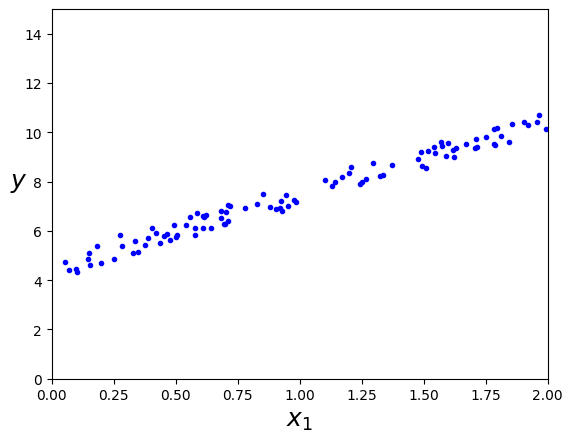

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Now Let's Compute $\theta$ using *Normal Equation* We Will use `inv()` from `np.linalg` Function to compute Invers of the Matrix.

In [3]:
X_b = np.c_[np.ones((100, 1)), x] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.43908786],
       [3.0344189 ]])

Till Now We Have Computed Our Best Theta Value so Let's Make Predictions.

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.43908786],
       [10.50792567]])

Let's Plot Our Models Predictions.

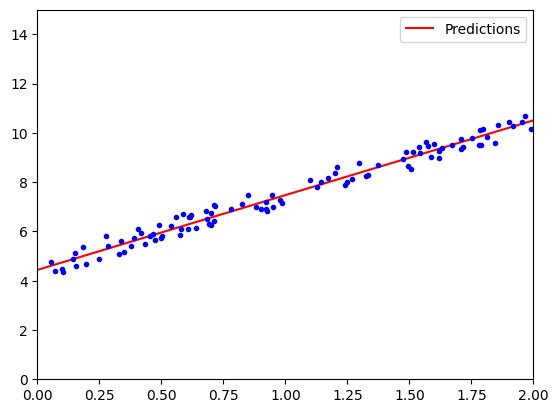

In [6]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

Doing The Same With `scikit-learn` is very Simple:

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.43908786] [[3.0344189]]


In [8]:
lin_reg.predict(X_new)

array([[ 4.43908786],
       [10.50792567]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.43908786],
       [3.0344189 ]])

If Don't Know What Does `1e-6` means? So It means That 1 and 6 Zeros = `1000000`

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.43908786],
       [3.0344189 ]])

# Computational Complexity
There are Two Ways to Compute Inverse of a Matrix:
## 1. Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix into three separate matrices. The purpose of this decomposition is to simplify the original matrix and identify patterns or relationships within the data.

For a given matrix A with dimensions m x n, SVD breaks it down into three matrices:

1. U: An m x m orthogonal matrix, which contains information about the relationships between the rows of the original matrix A.
2. Σ: An m x n diagonal matrix, which contains information about the importance of each dimension of the original matrix A. The diagonal values of Σ are called singular values.
3. V: An n x n orthogonal matrix, which contains information about the relationships between the columns of the original matrix A.

Mathematically, the SVD can be written as:

A = U Σ V^T

where T stands for transpose.
## 2. Normal Equation

The Normal Equation is a mathematical method used to find the optimal parameters for linear regression problems. It works by finding the set of parameters that minimizes the sum of squared differences between the predicted and actual values of the dependent variable.

In simple linear regression, where there is only one independent variable, the Normal Equation can be expressed as:

θ = (X^T X)^{-1} X^T Y

where θ is the vector of parameters (including the intercept term), X is the matrix of input features, Y is the vector of output values, and T denotes the transpose of a matrix.

## Exit
- Both **Normal Equation** and **SVD** appproach Get Very Slow When Number of Features Increase But After They Got Trained Once There Prediction Speed is Very Fast But this also means that Making Prediction on Twice Features Will take Twice as much time.
- Now we Will Look at a Very Different way to Train Linear Regression Model, which is Better Suited for cases where Large Number of features or too many training Instances to fit in memory.

# Gradient Descent
- Basically Gradient Descent is a technique to minimize the cost function.
- In Gradient Descent You Start By Filling **$\theta$**  with Random Values and then It Starts `Decreasing Cost Function(Mainly MSE)` Gradually by taking one step at a time and at the end it ends on the Minimum Value of `Cost Function` Possible.

### Hyperparameter - `Learning Rate`
`Learning Rate` is Basically Size of The Learning Step if it is too Low then it will take so Much Time to Compute even Smaller Datasets but if `Learning Rate` is too High then It Will take very Less Time to Compute but it will be very `Error Prone` so `Learning Rate` should be in a Balance Between High and Low.

## Batch Gradient Descent
- It is a type of Gradient Descent Where We Use Whole Dataset to take that Baby Step about Which we Talked Earlier.
- **Advantage** - Chances of Error are Nearn to Zere or Very Less.
- **Dissadvantages** 
  - Takes So Much Time to Compute Even Smaller Datasets.
  - Less Probability of Reaching `Global Minimum` instead of `Local Minimum`.

In [11]:
eta = 0.1  # Learning Rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.43908786],
       [3.0344189 ]])

Now You can See that it is Exactly Same as `The Normal Equation` so This Means that Batch Gradient Descent Worked Perfectly.

#### Let's Understand Seriousness of The Learning Rate with This Example :-
- If Learning Rate too Low then it will take so much time to complete the work.
  - **Learning Rate** - `0.02` then this will take almost twice as more time as `0.1`.
- If Learning Rate is Normal then it will be Perfectly Fine.
  - **Learning Rate** - `0.1` this is a Perfect Example of a Balanced Learning Rate.
- If Learning Rate is too High then it Will Jump the Actual Point.
  - **Learning Rate** - `0.5` then it Will Jumps the Actual Point and with Every Iteration It will Go far from Minimum Cost Function.

## Stochastic Gradient Descent
- `Stochastic Gradient Descent` is a Type of of Gradient Descent where We take a *Random instance* and then **Compute `Gradient` of the Whole Step through that Random Instance**.

### Advantages
- `Stochastic Gradient Descent` is very fast Because it dosen't Takes Whole Dataset to Compute each `Gradient`.
- It takes Very Less Computing Power to Computer even Larger Datasets.
- There is a High Possiblitiy of Reaching Global Minimum if Compared to Batch Gradient Descent.

### Dissadvantages
- `Stochastic Gradient Descent` is Error Prone.
- Normally it Jumps and Forth Between the Minimum Gradient So Many Times.

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # Initializing Random Values

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
theta

array([[4.43601067],
       [3.03450299]])

### `Stochastic Gradient Descent` in Linear Regression - **`Scikit-Learn`**

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.41271648]), array([3.03962107]))

## Mini-Batch Gradient Descent
You have learned about `Batch Gradient Descent` and `Stochastic Gradient Descent` up to this point in time. While `BatchGD` uses the entire dataset to compute a single learning step, `StochasticGD` uses one random instance to compute the entire learning step. Both have advantages and disadvantages. **Let's move on to `Mini-Batch Gradient Descent`, which is sort of present between the other two.**
- **Defination** - `Mini-batch gradient descent` is similar to batch gradient descent but uses mini-batches(smaller subsets) of the entire dataset at each iteration. The same idea as batch gradient descent applies here too: updating parameters towards reducing the loss on the mini-batch.

### Advantages
- Reduces memory usage by processing smaller portions of data at once.
- Allows for faster adaptation to changing conditions through incremental adjustments based on small sets of data.
- Increases stability and reliability by smoothing out fluctuations that may arise from working with limited amounts of information at any given time.

### Disadvantages
- **Noise sensitivity** - Mini-batch gradient descent is prone to being affected by noise in the selected mini-batches, potentially leading to suboptimal results.
- **Variance of gradients** - Randomness in the selection of mini-batches causes variations in the gradients calculated, resulting in increased instability and uncertainty.
- **Higher computaional cost** - Evaluating gradients for each mini-batch incurs extra computational expense compared to traditional batch gradient descent, particularly with larger mini-batch sizes.

# Comparison of Algorithims for Linear Regression

|    Algorithim   | Large m | Out-of-Core-Support | Large n | Hyperparameters | Scaling Required |   Scikit-Learn   |
|-----------------|---------|---------------------|---------|-----------------|------------------|------------------|
| Normal Equation |   Fast  |         No          |   Slow  |        0        |        No        |        N/A       |
|       SVD       |   Fast  |         No          |   Slow  |        0        |        No        | LinearRegression |
|     BatchGD     |   Slow  |         No          |   Fast  |        2        |        Yes       |   SGDRegressor   |
|  Stochastic GD  |   Fast  |         Yes         |   Fast  |       >=2       |        Yes       |   SGDRegressor   |
|  Mini-Batch GD  |   Fast  |         Yes         |   Fast  |       >=2       |        Yes       |   SGDRegressor   |

# Polynomial Regression
- What if Your Data is more Comples than a Straght Line ? Surprisingly, We can use Linear Model to Fit Nonlinear Data By adding Powers to each feature as a new feature and this technique known as Polynomial Regression.

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

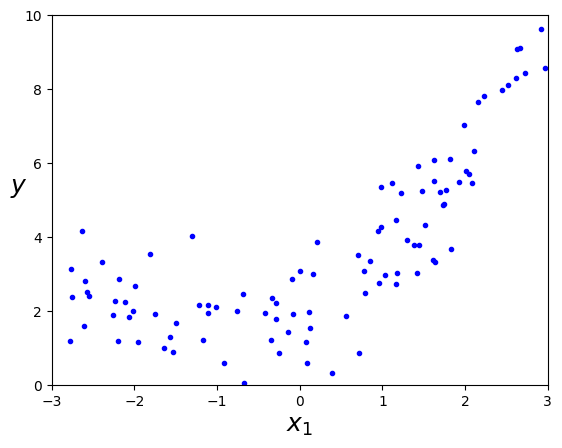

In [18]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

After Plotting This Data its Clearn That a Straight Line Will never fit this Data Properly So Here We are Going to use **Scikit-Learn**,s `PolynomialFeatures` class to transform our training data.

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)

In [20]:
X[0]

array([0.71526227])

In [21]:
X_poly[0]

array([1.        , 0.71526227, 0.51160012])

`X_poly` now Contains the original feature of `X` plus the square of this feature. Now you can fit a `LinearRegression` model to this extended training data.

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97943682]), array([[0.        , 1.02688636, 0.50393148]]))

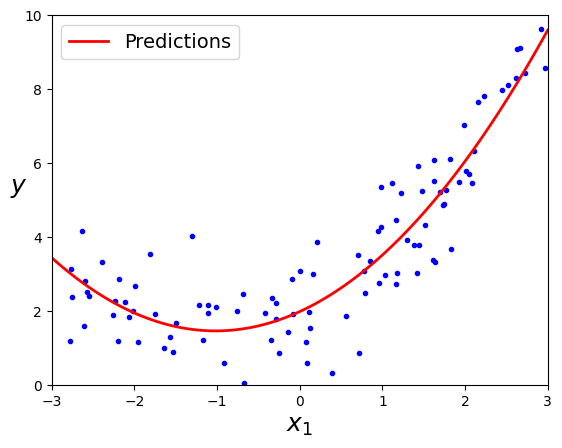

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# Learning Curves
The Graph Which is Plotted Below Shows that How Well `Linear Regression(1)`, `Quadratic Model(2)` and `300-degree Plynomial` perform on a DataSet.

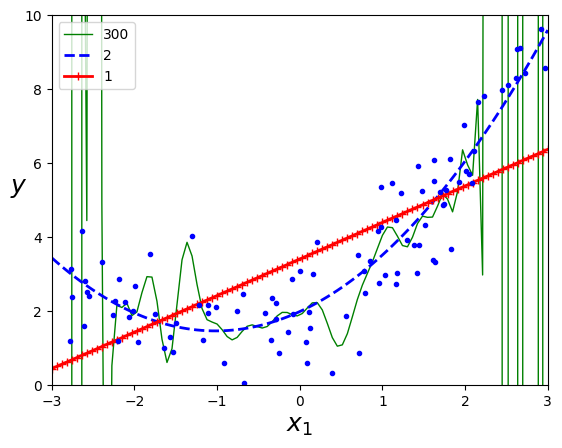

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

After all of This You can Conclude that :-
- `Linear Regression` Underfits the Data.
- `300-degree Polynomial` Overfits the Data.
- `Quadratic Model` Generalizes Mostly Well Because this Dataset Was **Generated** With `Quadratic Model`.

So, How do We Know that `Linear Regression` is **Underfitting**, `300-degree Polynomial` is Generalizing and `Quadratic Model` is **Overfitting**. There a Two Ways to do This.


### First Method
- If a Model is Performing Well on Training Set but not on Testing Set then it is **Overfitting** the Dataset.
- If a Model Performs Worse on Both Training Set and Testing Set then it is **Underfitting** the Dataset.
- If a Model Hits the Sweet Spot Between these two then it is **Generalizing** the Dataset Very Well.

### Second Method
We can use `Learning Curves` Here to Check if Our Model is not **Overfitting** and **Underfitting** the Dataset.
- To Generate Plot we can Train the Model on Several times on different sized subsets of the training set. The following code difines a function that given some training data plots the learning curves of a model.

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.legend(fontsize=14)

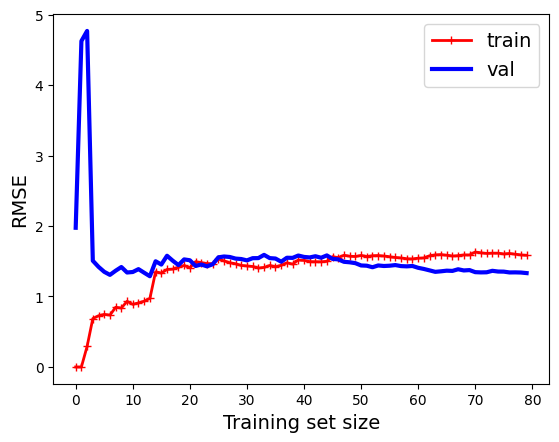

In [26]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

You can See that this Model Underfits the Data Because :-
-  In The Starting of **Training Data** `RMSE` Was Zero Because **Model Fit them Perfectly** but as the number of Instances Grow `RMSE` Starts Increasing Because **The Model is unable to Generalize Well** and at last It Ends With a Plateau.
-  In The Starting of **Validation Data** `RMSE` Was So high Because **Model is Incapable of Generalizing Properly** which is Why The Validation Error is initialy Big Then as the Model is Shown More Training Examples **It Starts Learning** and `RMSE` Goes down and again **Ends With a Plateau Very Close to Other Curve**.

This is a Typical model that's Underfitting Both Curves have Reached a Plateau; the a Fairly Close and Very High.

##### **Note** - If a Model is Underfitting the Training Data Adding More Example Won't work You Have to come up with a more Complex Model or come up with a Better Feature.

### Testing a `10th-degree Polynomial` on the Same Data.

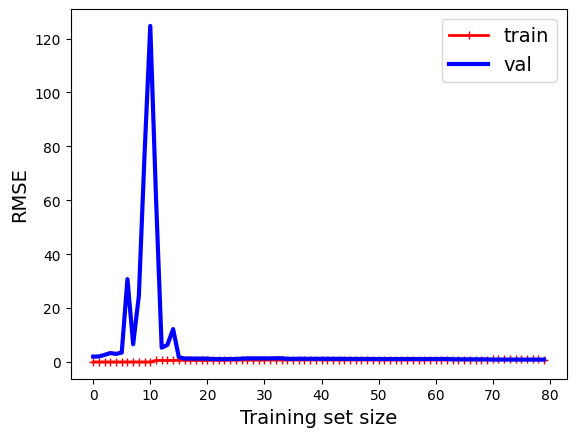

In [27]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ]
)

plot_learning_curves(polynomial_regression, X, y)

##### **Note** - One Way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

## The Bias/Varience Trade off
An Important Theoretical result of statistics and Machine Leanring is the fact that model's generalization error can be expressed in three very different Errors.

### Bias
This Part of the Generalization error is due to wrong assumption such as assuming that the data is linear when it is actually quadratic. A high-bias model is more likely to underfit the training data.

### Varience
This part is due to the model's excessive snsitivity to small variations in the training data. A model with many degrees of freedom(such as a high-degree polynomial model) is likely to have high varience and thus overfit the training data.

### Irreducible error
This part is due to the noisiness of the data itself. The only way to reduce this part of error is to clean up the data (e.g., fix the data sources, such as broken sensors or detect and remove outliers).

### Exit
Increasing a model's complexity will typically increase its varience and reduce its bias.Conversely, reducing a model's complexity increases its bias and reduces its varience. This is Why it is called Tradeoff.

# Regularized Linear Models
We can Solve the Problem of Overfitting By **Regularizing the Model**.
- A Simple Way to Regularize a `Polynomial Model` is to **reduce Number of Polynomial Degrees**.
- In a `Linear Model` Regularization can be achieved by **Constraining the weights of the model**.
- Regularization in `Ridge Regression`, `Lasso Regression`, and `ElasticNet Regression` are complex so we Will **Regularize them Seperately**.

- **Resources** - `Hindi`
  - Youtube Playlist - [Regularisation in Hindi by CampusX.](https://youtube.com/playlist?list=PLKnIA16_RmvZuSEZ24Wlm13QpsfLlJBM4)
  - **Regularisation** with `Ridge Regression`.
    - [Ridge Regression Part 1 | Geometric Intuition and Code | Regularized Linear Models](https://youtu.be/aEow1QoTLo0).
    - [Ridge Regression Part 2 | Mathematical Formulation & Code from scratch | Regularized Linear Models](https://youtu.be/oDlZBQjk_3A).
    - [Ridge Regression Part 3 | Gradient Descent | Regularized Linear Models](https://youtu.be/Fci_wwMp8G8).
    - [5 Key Points - Ridge Regression | Part 4 | Regularized Linear Models](https://youtu.be/8osKeShYVRQ).
  - **Regularisation** with `Lasso Regression`.
    - [Lasso Regression | Intuition and Code Sample | Regularized Linear Models](https://youtu.be/HLF4bFbBgwk).
    - [Why Lasso Regression creates sparsity?](https://youtu.be/FN4aZPIAfI4).
  - **Regularisation** with `ElasticNet Regression`.
    - [ElasticNet Regression | Intuition and Code Example | Regularized Linear Models](https://youtu.be/2g2DBkFhTTY).

- **Resources** - `English`
  - `Ridge Regression` - [Regularization Part 1: Ridge (L2) Regression](https://youtu.be/Q81RR3yKn30).
  - `Lasso Regression` - [Regularization Part 2: Lasso (L1) Regression](https://youtu.be/NGf0voTMlcs).
  - `ElasticNet Regression` - [Regularization Part 3: Elastic Net Regression](https://youtu.be/1dKRdX9bfIo).
  - `Ridge v/s Lasso Regression` - [Ridge vs Lasso Regression, Visualized!!!](https://youtu.be/Xm2C_gTAl8c).

## Ridge Regression
- Ridge Regression is Regularized Version of Linear Regression.
$$J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} \theta_i^2 \$$
- As You can See there is a `Regularisation` Term added to the `Cost Function` at the end of this `Equation` Which **Increases the Bias and Reduces the Varience** Which is Good for `Preventing from Overfitting` and `Generalisation`.
  - This forces Learning `Algorithim` to not only **Fit the Data** but Also Keep the `Model Weights` as small as Possible.
- **`Note`** - The `Regularisation` Term Should only be add to the `Cost Function` Only When You are **training the Data**. You Will not Want to Use it While **Testing the Data**.

You can also use `hyperparameter` $\alpha$ to define how much you want to **Regularise the Model**.
- if $\alpha$ = 0 then `Ridge Regression` will remain `Linear Regression`.
- if $\alpha$ us very large then all `weights` will come **close to zero resulting a flat line through the data**.

In [28]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [29]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [30]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46619232])

The `penalty` **hyperparameter** sets the type of Regularisation tern to use.

##### **Note** - It is Important to Scale the Data(eg.using StandardScaler) Before performing Ridge Regression as it is sensitive to scale of the input features. This is true of most regularized models.

### Importance of $\alpha$

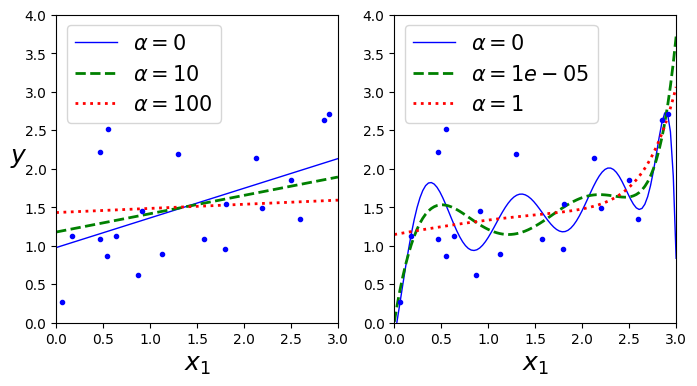

In [31]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

A `Linear Model` **`(left)`** and a `Polynomial Model` **`(right)`** with Various Levels of `Ridge Regression`.

## Lasso Regression
- `Lasso Regression` - Least Absolute Shrinkage and Selection Operator Regression.
- It is also a `Regularised` form of `Linear Regression` and Just Like `Ridge Regression` it **adds a Regularisation term to the cost function**.
- The Only Difference Between `Ridge Regression` and `Lasso Regression` is that `Ridge Regression` uses `l2 norm` but `Lasso Regression` Uses `l1 norm`.
- If You dont know about `l1` and `l2` norms :-
  - `l1 norm` means that `Absolute Values` of the vector **w** will be used in the `Cost Function`.
  - `l2 norm` means that `Squared Values` of the vector **w** will be used in the `Cost Function`.